In [1]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
from sklearn import datasets

In [5]:
from sklearn.linear_model import LinearRegression

In [8]:
data = datasets.load_diabetes()
data.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [9]:
df = pd.DataFrame(data['data'],index=data['target'],columns=data['feature_names'])
df.head(4)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
151.0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
75.0,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
141.0,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
206.0,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362


In [10]:
lr = LinearRegression()

In [11]:
y = df.index.values
x = df.bmi.values

In [13]:
x = x.reshape(-1,1)
y = y.reshape(-1,1)

In [16]:
lr.fit(x,y)

LinearRegression()

In [18]:
print(lr.coef_[0], lr.intercept_,sep=', ')

[949.43526038], [152.13348416]


In [22]:
y2 = lr.coef_[0]*x + lr.intercept_

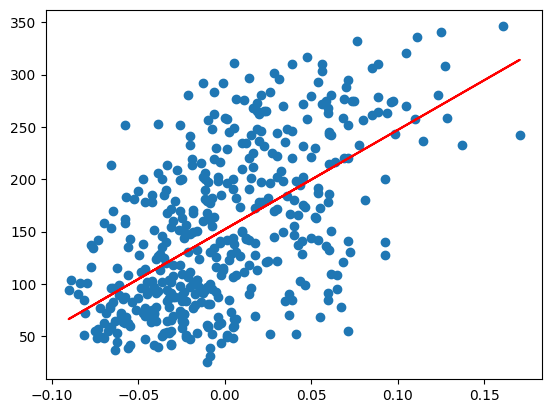

In [23]:
import matplotlib.pyplot as plt
plt.scatter(x,y)
plt.plot(x,y2,color='red')
plt.show()

In [25]:
import statsmodels.api as sm

In [26]:
results = sm.OLS(y, sm.add_constant(x)).fit()

In [27]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.344
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                     230.7
Date:                Tue, 04 Apr 2023   Prob (F-statistic):           3.47e-42
Time:                        16:45:14   Log-Likelihood:                -2454.0
No. Observations:                 442   AIC:                             4912.
Df Residuals:                     440   BIC:                             4920.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.1335      2.974     51.162      0.000     146.289     157.978
x1           949.4353     62.515     15.187      0.000     826.570    1072.301
==============================================================================
Omnibus:                       11.674   Durbin-Watson:                   1.848
Prob(Omnibus):                  0.003   Jarque-Bera (JB):                7.310
Skew:                           0.156   Prob(JB):                       0.0259
Kurtosis:                       2.453   Cond. No.                         21.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
results.rsquared

0.3439237602253802